<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Deep_Learning_TS_Model_using_Deep_AR_Univariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

     |████████████████████████████████| 68.7MB 65kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 573kB 4.3MB/s 
     |████████████████████████████████| 194kB 30.7MB/s 
     |████████████████████████████████| 8.7MB 21.3MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68010 sha256=daecba92b3b1fb9cadfc39412eb357e7472e09e1b58c23d780340399f70438a8
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import Image, display 


from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

gluonts.trainer is deprecated. Use gluonts.mx.trainer instead.



In [3]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [4]:
df1 = pd.read_csv('energydata_complete.csv')

In [5]:
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


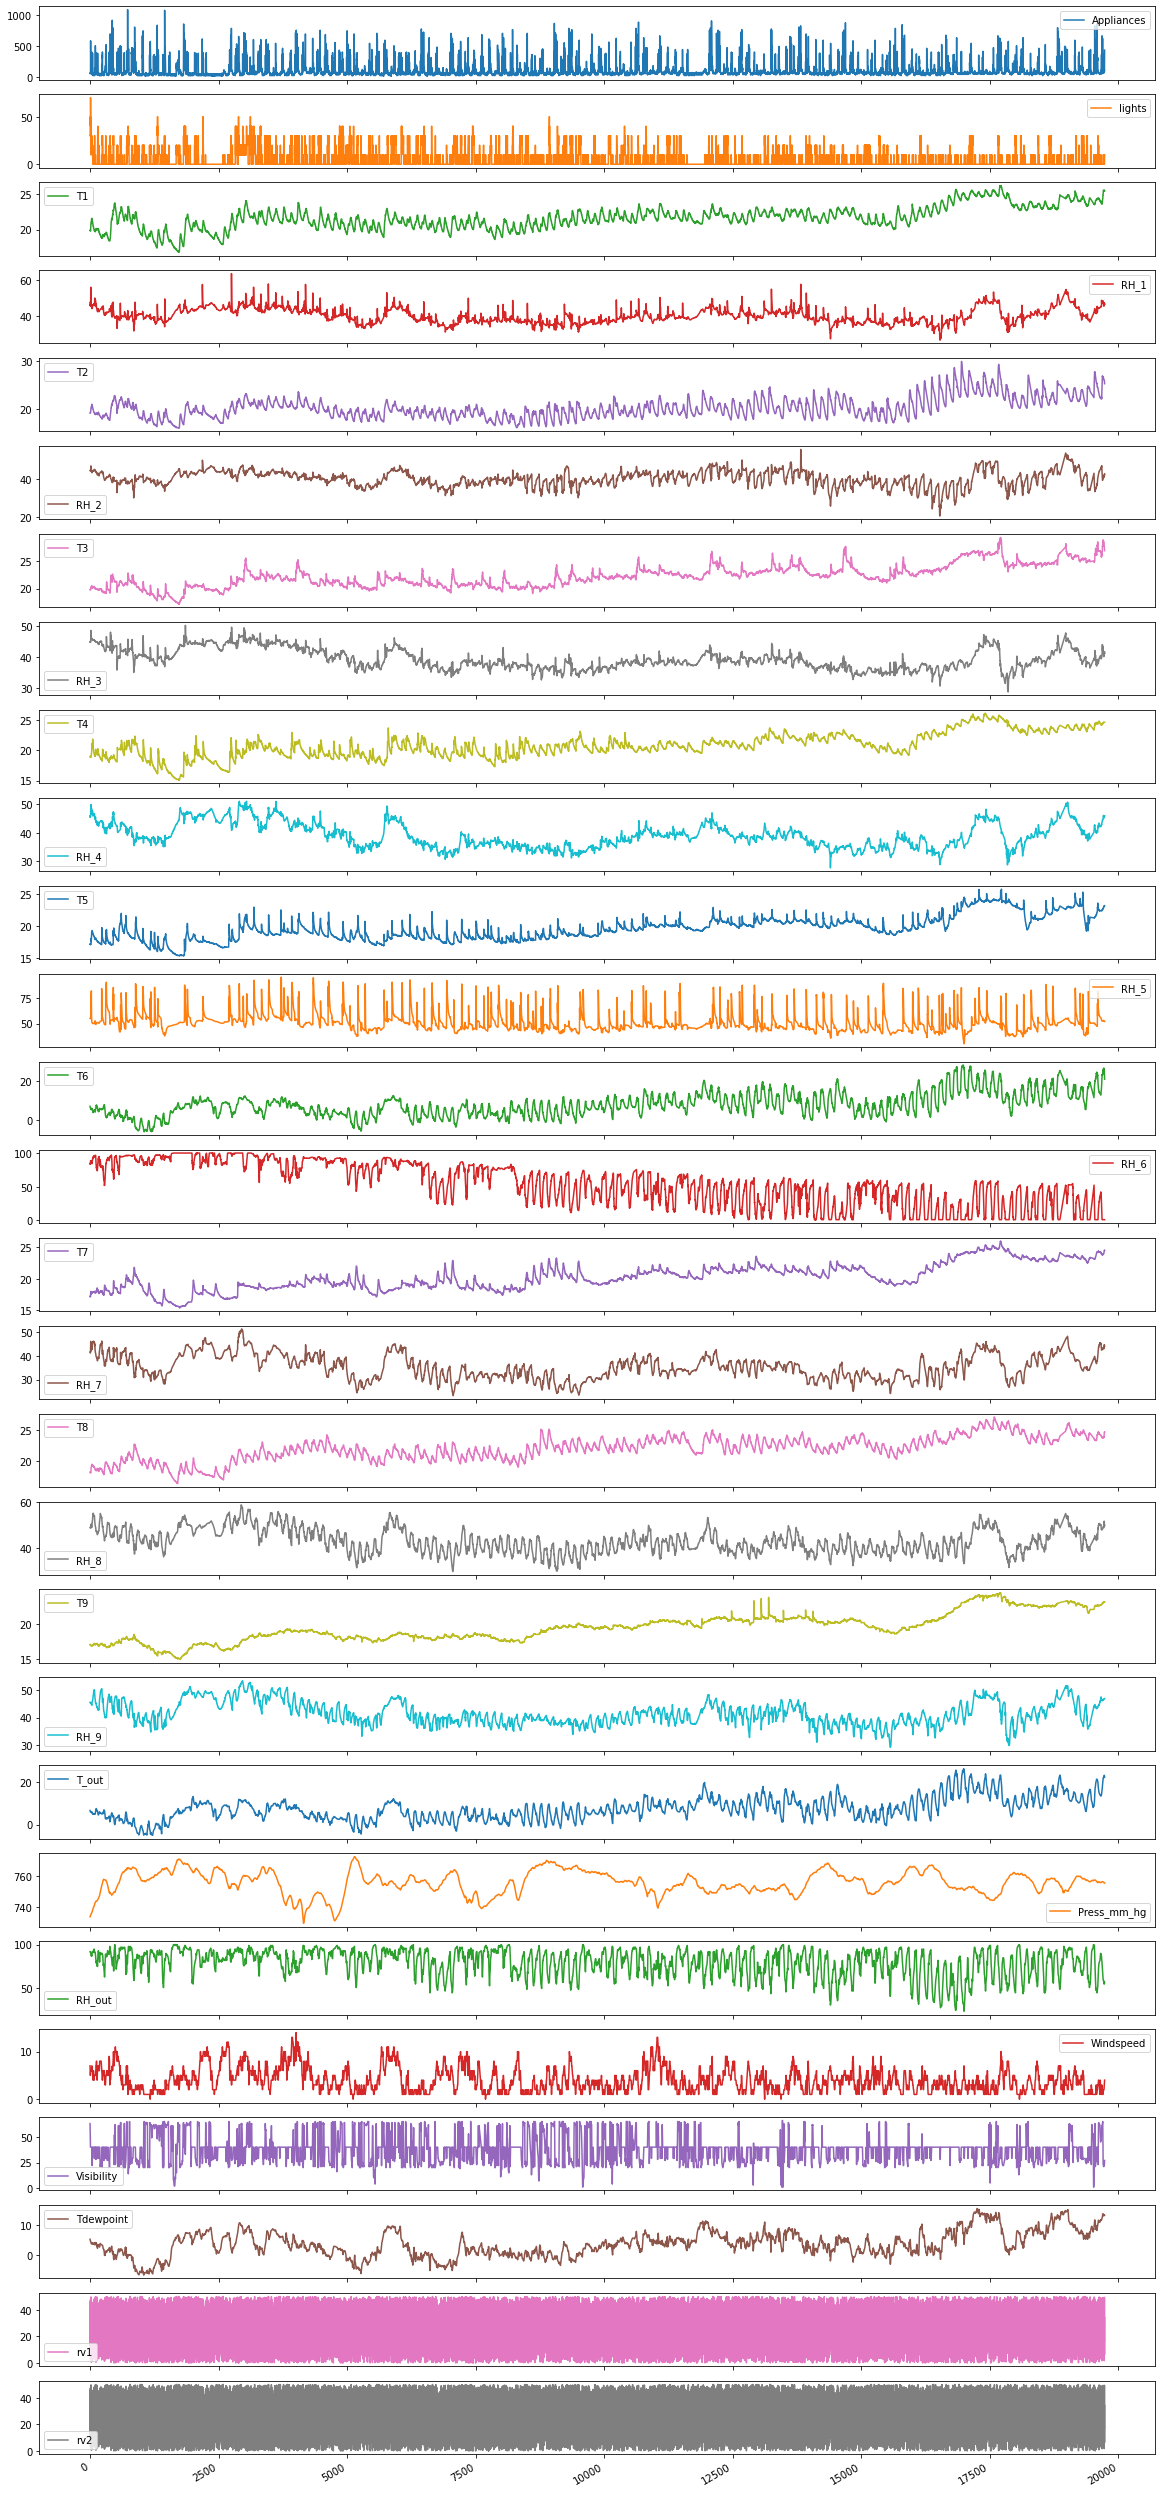

In [6]:
df1.plot(subplots=True, figsize=(20,50));

In [7]:
df2 = df1[['date','Appliances','T_out','Visibility','Tdewpoint','RH_out','Windspeed']]

In [8]:
df2.head()

,date,Appliances,T_out,Visibility,Tdewpoint,RH_out,Windspeed
0,2016-01-11 17:00:00,60,6.600000,63.000000,5.3,92.0,7.000000
1,2016-01-11 17:10:00,60,6.483333,59.166667,5.2,92.0,6.666667
2,2016-01-11 17:20:00,50,6.366667,55.333333,5.1,92.0,6.333333
3,2016-01-11 17:30:00,50,6.250000,51.500000,5.0,92.0,6.000000
4,2016-01-11 17:40:00,60,6.133333,47.666667,4.9,92.0,5.666667


In [9]:
df2 = df2.set_index('date')

In [10]:
df2.head()

,Appliances,T_out,Visibility,Tdewpoint,RH_out,Windspeed
date,,,,,,
2016-01-11 17:00:00,60,6.600000,63.000000,5.3,92.0,7.000000
2016-01-11 17:10:00,60,6.483333,59.166667,5.2,92.0,6.666667
2016-01-11 17:20:00,50,6.366667,55.333333,5.1,92.0,6.333333
2016-01-11 17:30:00,50,6.250000,51.500000,5.0,92.0,6.000000
2016-01-11 17:40:00,60,6.133333,47.666667,4.9,92.0,5.666667


In [11]:
train_time = "2016-05-10 00:00:00"

In [12]:
#prediction length 6*(24*2) where 6 comes from 10 mins data
prediction_length=288

In [13]:
estimate = DeepAREstimator(freq='10min', context_length=720,prediction_length=prediction_length,num_layers=3,num_cells=128,cell_type='lstm',
                           trainer=Trainer(epochs=10))

In [14]:
from gluonts.dataset.common import ListDataset

In [15]:
training_data = ListDataset([{"start": df2.index[0], "target": df2.Appliances[:train_time]}], freq="10min")

In [16]:
predict =estimate.train(training_data=training_data)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [06:00<00:00,  7.20s/it, epoch=10/10, avg_epoch_loss=4.33]


In [27]:
test_data = ListDataset(
[
    {"start": df2.index[0], "target": df2.Appliances[:"2016-05-11 00:00:00"]},
    {"start": df2.index[0], "target": df2.Appliances[:"2016-05-15 00:00:00"]},
    {"start": df2.index[0], "target": df2.Appliances[:"2016-05-20 00:00:00"]},
    {"start": df2.index[0], "target": df2.Appliances[:"2016-05-25 00:00:00"]},
    {"start": df2.index[0], "target": df2.Appliances[:"2016-05-30 00:00:00"]}
],
freq="10min"
)

In [28]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [30]:
forecast_it , ts_it = make_evaluation_predictions(dataset=test_data,predictor=predict,num_samples=100)

In [31]:
forecast_list = list(forecast_it)
ts_it_list = list(ts_it)

In [34]:
forecast_1 =forecast_list[0]

In [63]:
ts_1 = ts_it_list[0]

In [69]:
def prob_forecast(ts_it, forecast_it):
  plot_length = prediction_length
  pred_intervals =(80,90)
  legend = ["observation","median prediction"] + [f"{k}% pred_intervals" for k in pred_intervals][::-1]

  fig,ax = plt.subplots(1,1, figsize=(10,7))
  ts_1[-plot_length:].plot(ax=ax)
  forecast_1.plot(prediction_intervals=pred_intervals, color='g')
  plt.grid(which='both')
  plt.legend(legend)
  plt.show()

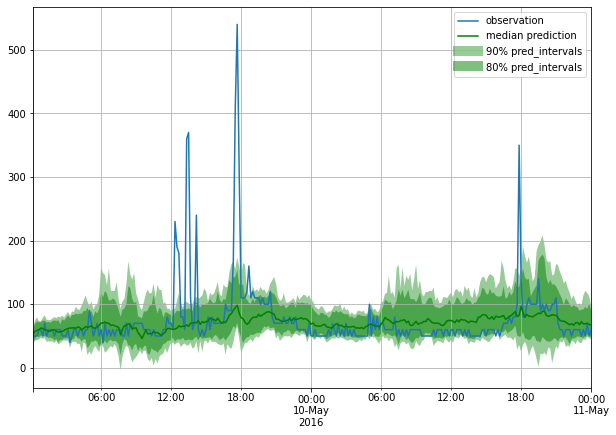

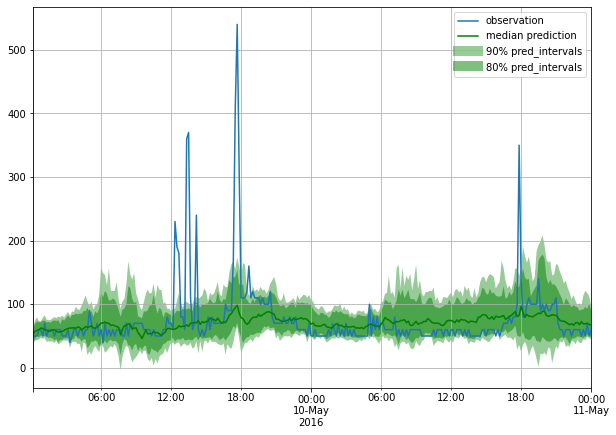

In [71]:
prob_forecast(ts_it_list[0], forecast_list[0])
prob_forecast(ts_it_list[1], forecast_list[1])

In [76]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1,0.5,0.9])
agg_metrics, item_metrics = evaluator(iter(ts_it_list), iter(forecast_list), num_series=len(test_data))


Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 77.93it/s]WARNING:gluonts.time_feature.seasonality:Multiple 10 does not divide base seasonality 1. Falling back to seasonality 1.



In [77]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,2685.977431,6280.649414,21750.0,75.520833,30.036398,0.726046,0.231988,0.232374,NaN,11.311997,1764.556640,0.093750,6280.649250,0.666667,5972.036189,0.927083
1,NaN,17965.975694,20119.337891,38610.0,134.062500,29.612152,2.359126,0.311927,0.431247,NaN,57.750223,5061.694610,0.020833,20119.338039,0.246528,27300.151900,0.618056
2,NaN,2303.986762,7801.835938,21910.0,76.076389,29.603382,0.915088,0.377544,0.307623,NaN,8.615298,2707.824852,0.260417,7801.835835,0.815972,5190.215779,0.954861
3,NaN,4293.243490,10000.126953,25810.0,89.618056,29.529659,1.175857,0.330177,0.339439,NaN,16.019049,2982.402220,0.211806,10000.126816,0.642361,10272.830557,0.795139
4,NaN,20199.506944,21055.671875,39700.0,137.847222,29.329425,2.492718,0.363464,0.432252,NaN,49.390296,5293.489416,0.159722,21055.671925,0.576389,26161.469057,0.732639
